## Ejemplo cálculo distancias

El set de datos USArrests contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP). Empleando estas variables, se pretende calcular una matriz de distancias que permita identificar los estados más similares.

Tareas

- Aplicar el escalado de los datos
- Calcular la distancia
- Observaciones: Las más similares y estados con mayor y menor distancia

#### Librerías a utilizar

In [1]:
# Libreria para las operaciones matematicas
import numpy as np
# Libreria para el manejo de DataFrames
import pandas as pd
# Libreria para gráficas
import matplotlib.pyplot as plt

# Libreria para el escalado de los datos
from sklearn.preprocessing import scale
# Libreria para las distancias (Euclidiana, Manhattan)
from sklearn.metrics import pairwise_distances

#### Cargue de los Datos

In [2]:
datos = pd.read_csv("data/USArrests.csv", sep=";")
datos.head(4)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5


In [3]:
# Se cambia el indice del DataFrame por el nombre del estado
datos= datos.set_index('State')
datos.head(4)

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


#### Escalado de las variables

In [4]:
# Escalado de las variables
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794


#### Cálculo de distancia

In [5]:
# Cálculo de distancias
print('------------------')
print('Distancia Euclídiana')
print('------------------')
distancias = pairwise_distances(
                X = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.iloc[:4,:4]


------------------
Distancia Euclídiana
------------------


State,Alabama,Alaska,Arizona,Arkansas
State,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN
Arkansas,1.302905,2.854730,2.74535,NaN


#### Observaciones

In [6]:
# Observaciones más similares
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .sort_values('distancia') \
    .dropna()


,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.207944
631,New York,Illinois,0.353774
665,Kansas,Indiana,0.433124
1148,Wisconsin,Minnesota,0.499099
928,New Hampshire,Maine,0.504669
...,...,...,...
244,Vermont,California,6.093594
433,North Dakota,Florida,6.096939
1394,Vermont,Nevada,6.105144
1383,North Dakota,Nevada,6.113387


Text(0.5, 1.0, 'Estados con mayor distancia')

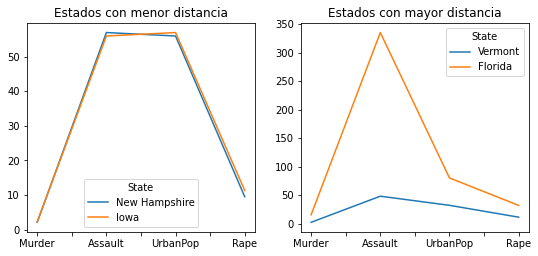

In [7]:
# Estados con mayor y menor distancia
fig, axs = plt.subplots(1,2, figsize=(9, 3.84))
datos.loc[['New Hampshire', 'Iowa']].transpose().plot(ax= axs[0])
axs[0].set_title('Estados con menor distancia')
datos.loc[['Vermont', 'Florida']].transpose().plot(ax= axs[1])
axs[1].set_title('Estados con mayor distancia')